# Actividad - Ecuaciones diferenciales

Juan Pablo Dominguez Rodriguez 

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp, odeint

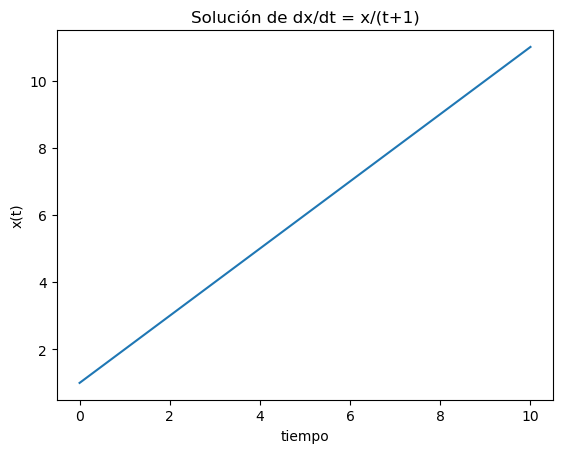

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definir la ecuación diferencial
def f(t, x):
    return x / (t + 1)

# Condiciones iniciales
x0 = [1]

# Tiempo
t_span = [0, 10]

# Resolver la ecuación diferencial
sol = solve_ivp(f, t_span, x0, t_eval=np.linspace(0, 10, 1000))

# Graficar la solución
plt.plot(sol.t, sol.y[0])
plt.xlabel('tiempo')
plt.ylabel('x(t)')
plt.title('Solución de dx/dt = x/(t+1)')
plt.show()

Grafique con condición inicial $x_0 = 2$

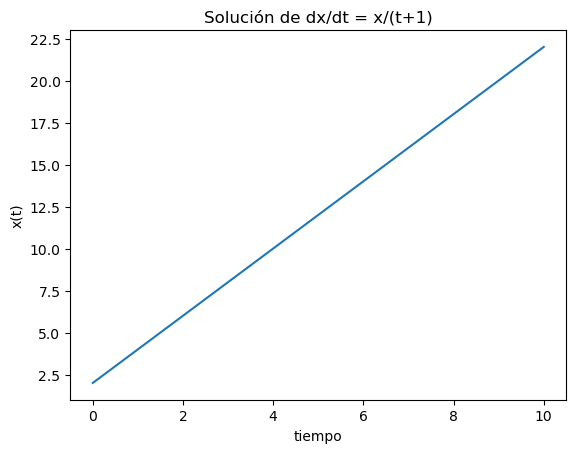

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definir la ecuación diferencial
def f(t, x):
    return x / (t + 1)

# Condiciones iniciales
x0 = [2]

# Tiempo
t_span = [0, 10]

# Resolver la ecuación diferencial
sol = solve_ivp(f, t_span, x0, t_eval=np.linspace(0, 10, 1000))

# Graficar la solución
plt.plot(sol.t, sol.y[0])
plt.xlabel('tiempo')
plt.ylabel('x(t)')
plt.title('Solución de dx/dt = x/(t+1)')
plt.show()

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [ ]:
w0 = 3
def funcion(t, X) :
    dx = X[1]
    x = X[0]
    return [dx, -w0**2 * x]

from scipy.integrate import solve_ivp
t_span = [0, 10]
x0 = [0.5, 0.1]

sol = solve_ivp(funcion, t_span, x0, max_step = .01)
sol

plt.plot(sol.t, sol.y[0], label = "Posición")
plt.plot(sol.t, sol.y[1],  label = "Velocidad")
plt.grid()

In [13]:
w0 = 3
def funcion(t, X) :
    dx = X[1]
    x = X[0]
    return [dx, -w0**2 * x]

In [27]:
from scipy.integrate import solve_ivp
t_span = [0, 10]
x0 = [0.5, 0.1]

sol = solve_ivp(funcion, t_span, x0, max_step = .01)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 6008
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.  ,  0.01,  0.02, ...,  9.99, 10.  , 10.  ])
 t_events: None
        y: array([[0.5       , 0.50077487, 0.50109907, ..., 0.02919897, 0.04419134,
        0.04419134],
       [0.1       , 0.05496175, 0.00987404, ..., 1.50077539, 1.49747258,
        1.49747258]])
 y_events: None

Grafique

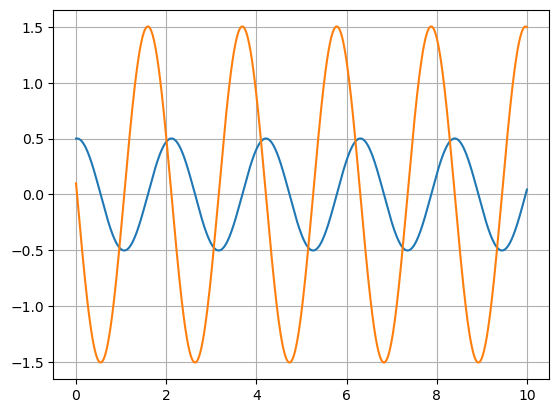

In [28]:
plt.plot(sol.t, sol.y[0], label = "Posición")
plt.plot(sol.t, sol.y[1],  label = "Velocidad")
plt.grid()

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [ ]:
def posicion(t, w0) :
    A = .5
    B = .1/w0
    return A*np.cos(w0*t) + B*np.sin(w0*t)

def velocidad(t) :
    A = .5
    B = .1/w0
    return w0*(-A*np.sin(w0*t) + B*np.cos(w0*t))

t = np.linspace(0,10)
p = posicion(t,w0)
v = velocidad(t)

plt.plot(sol.t, sol.y[0], label = "Numerica")
plt.plot(t, p,  label = "Analitica")
plt.legend()
plt.title("Posicion")
plt.grid()

In [20]:
def posicion(t, w0) :
    A = .5
    B = .1/w0
    return A*np.cos(w0*t) + B*np.sin(w0*t)

def velocidad(t) :
    A = .5
    B = .1/w0
    return w0*(-A*np.sin(w0*t) + B*np.cos(w0*t))



In [21]:
t = np.linspace(0,10)
p = posicion(t,w0)
v = velocidad(t)

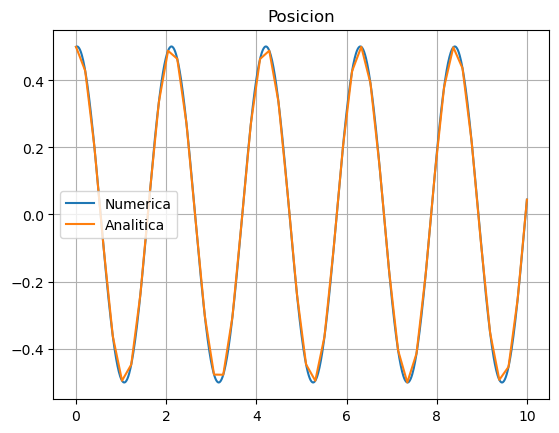

In [29]:
plt.plot(sol.t, sol.y[0], label = "Numerica")
plt.plot(t, p,  label = "Analitica")
plt.legend()
plt.title("Posicion")
plt.grid()

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

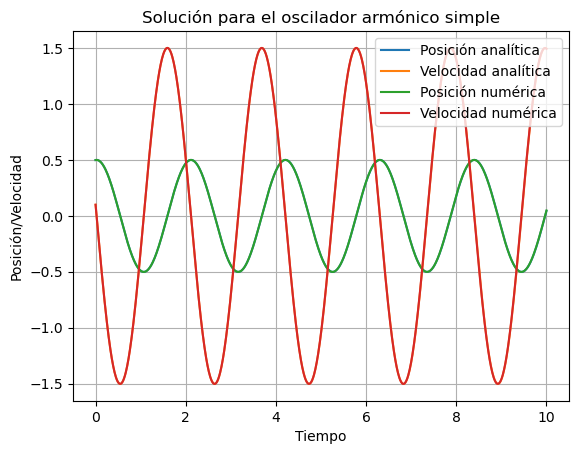

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definimos la función para la solución analítica
def posicion(t, w0) :
    A = .5
    B = .1/w0
    return A*np.cos(w0*t) + B*np.sin(w0*t)

def velocidad(t, w0) :
    A = .5
    B = .1/w0
    return -A*w0*np.sin(w0*t) + B*w0*np.cos(w0*t)

# Definimos la función para la solución numérica
w0 = 3

def funcion(t, X):
    dx = X[1]
    x = X[0]
    return [dx, -w0**2 * x]

t_eval = np.linspace(0, 10, 1000)
x0 = [0.5, 0.1]
sol = solve_ivp(funcion, t_span=[0, 10], y0=x0, t_eval=t_eval)

# Graficamos las soluciones
t = np.linspace(0, 10, 1000)
plt.plot(t, posicion(t, w0), label="Posición analítica")
plt.plot(t, velocidad(t, w0), label="Velocidad analítica" )
plt.plot(sol.t, sol.y[0], label="Posición numérica" )
plt.plot(sol.t, sol.y[1], label="Velocidad numérica" )
plt.legend()
plt.xlabel("Tiempo")
plt.ylabel("Posición/Velocidad")
plt.title("Solución para el oscilador armónico simple")
plt.grid()
plt.show()